<a href="https://colab.research.google.com/github/meghanareddy1808/nlp/blob/main/Kerasbsicsthroughlinerarreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Basics of tensorflow syntax
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam



In [4]:
N=100
X=np.random.random(N)*6-3
#adding gaussian noise also
y=0.5*X-1+ np.random.randn(N)*0.5

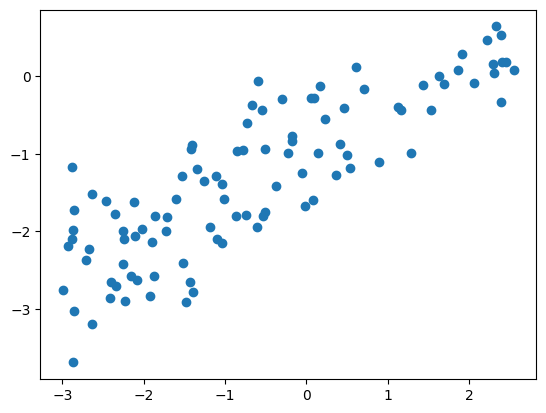

In [6]:
plt.scatter(X,y)

In [8]:
#build model
i=Input(shape=(1,)) #1D
x=Dense(1)(i) # this (mx+b) happens inside this layer, Dense(1)--crates the obj, but extra i to treat as obj
model= Model(i,x)



In [10]:
model.summary()
#Dense Layer --- neurons in this layer ae connected to every other neuron of the prev layer

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(
    loss='mse',
    #optimizer='adam' ,if want to use default values else down one
    optimizer= Adam(learning_rate=0.1) ,#gradient descent
    metrics=['mae'] #mean absol error-----relevant in classi ,not in reg here cuz there loss is diff


)

In [14]:
r=model.fit(
    X.reshape(-1,1),y,
    epochs = 200,
    batch_size =32,
)

Epoch 1/200
4/4 [==============================] - 0s 4ms/step - loss: 3.2846 - mae: 1.4703
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 1.6031 - mae: 1.0078
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6900 - mae: 0.6957
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3568 - mae: 0.4912
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3796 - mae: 0.5005
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4419 - mae: 0.5592
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4449 - mae: 0.5564
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4048 - mae: 0.5356
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3645 - mae: 0.5033
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3188 - mae: 0.4646
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2987 

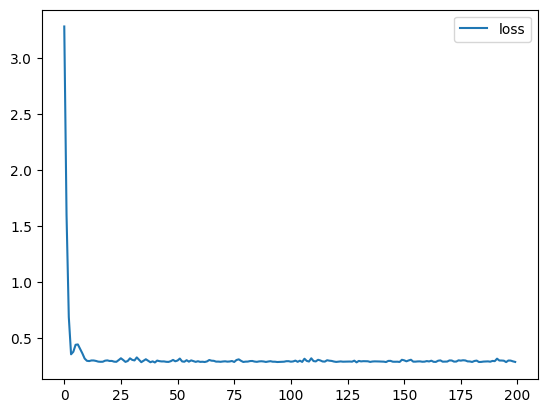

In [15]:
plt.plot(r.history['loss'], label='loss')
plt.legend()

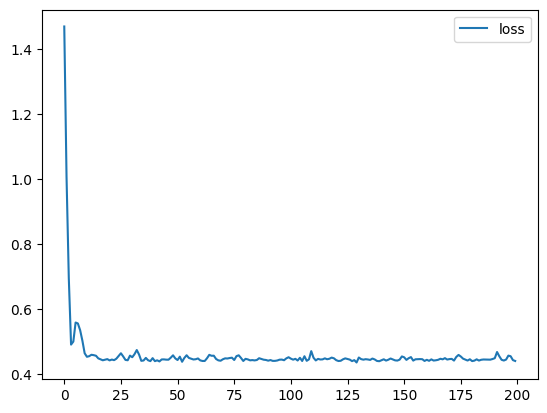

In [16]:
plt.plot(r.history['mae'], label='loss')
plt.legend()

In [19]:
#make predictions
Xtest = np.linspace(-3,3,20).reshape(-1,1)
ptest= model.predict(Xtest)

1/1 [==============================] - 0s 31ms/step


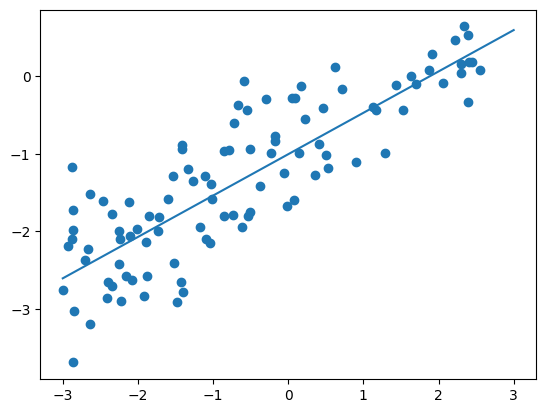

In [22]:
plt.scatter(X,y)
plt.plot(Xtest,ptest)

In [23]:
model.layers

In [24]:
#to get params at dense layer--layer 1---her m,b--in reg
model.layers[1].get_weights()

[array([[0.5330066]], dtype=float32), array([-1.0065833], dtype=float32)]